In [66]:
import json

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False  # https://stackoverflow.com/questions/43102564/matplotlib-negative-numbers-on-tick-labels-displayed-as-boxes
plt.style.use('seaborn-ticks')  # 'seaborn-ticks'
import numpy as np
import seaborn as sns 

In [70]:
# colors and class-superclass maps
with open(r'..\data\metadata\color_schemes.json') as infile:
    colors = json.load(infile, parse_int=True)
    
data = pd.read_csv(r'../data/processed/combined_metabolites_data_with_model_params.csv').set_index('i')
data_cols = data.filter(regex='_FBG|_RBG').columns
fbg_cols = data.filter(regex='_FBG').columns
rbg_cols = data.filter(regex='_RBG').columns

ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)
fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)

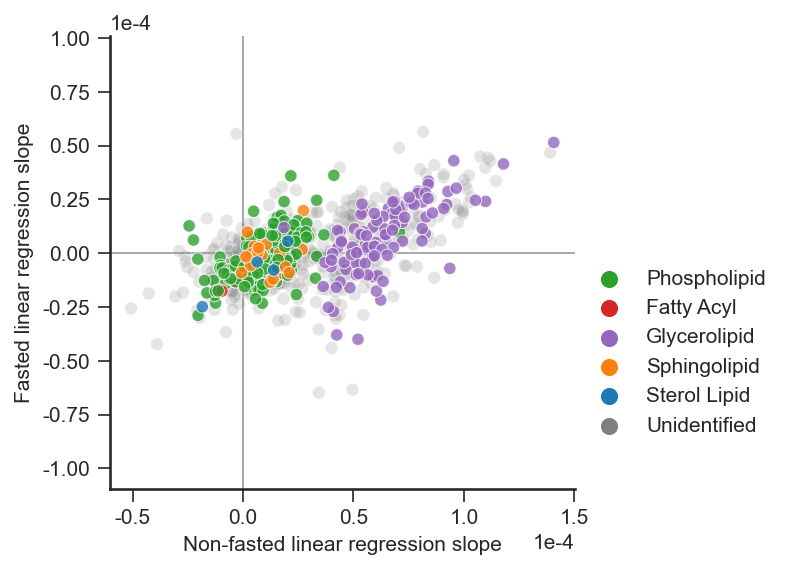

In [68]:
fig, ax = plt.subplots(figsize=(4,4), dpi=150)
sns.scatterplot(
    data=data.loc[(data['superclass'] != 'Unidentified') & (data['Type'] == 'lipid')],
    x='coef_fed', y='coef_fasted', hue='superclass', ax=ax, palette=colors,
    alpha=0.8
)
sns.scatterplot(
    data=data.loc[(data['superclass'] == 'Unidentified') & (data['Type'] == 'lipid')],
    x='coef_fed', y='coef_fasted', hue='superclass', ax=ax, palette=colors,
    alpha=0.2, zorder=-10
)

###### 2 options for making sure the axes are equally scaled to not bias against non-fasted:
########## 1. ax.set_aspect('equal') enforces square, but distorts plot
########## 2. ylim average +/- 0.5 * xlim range 
# ax.set_aspect('equal')

avg_ylim = np.mean([y for y in ax.get_ylim()])
xlim_range = abs(ax.get_xlim()[0] - ax.get_xlim()[1])
ax.set_ylim(avg_ylim-0.5*xlim_range, avg_ylim+0.5*xlim_range)

ax.set_ylabel('Fasted linear regression slope')
ax.set_xlabel('Non-fasted linear regression slope')

ax.ticklabel_format(style='sci', scilimits=(-1, 1))
ax.axvline(0, c='gray', linewidth=0.8, alpha=0.8, zorder=-99)
ax.axhline(0, c='gray', linewidth=0.8, alpha=0.8, zorder=-99)
ax.legend(loc=(1.01, 0.1), markerscale=1.2)
sns.despine()

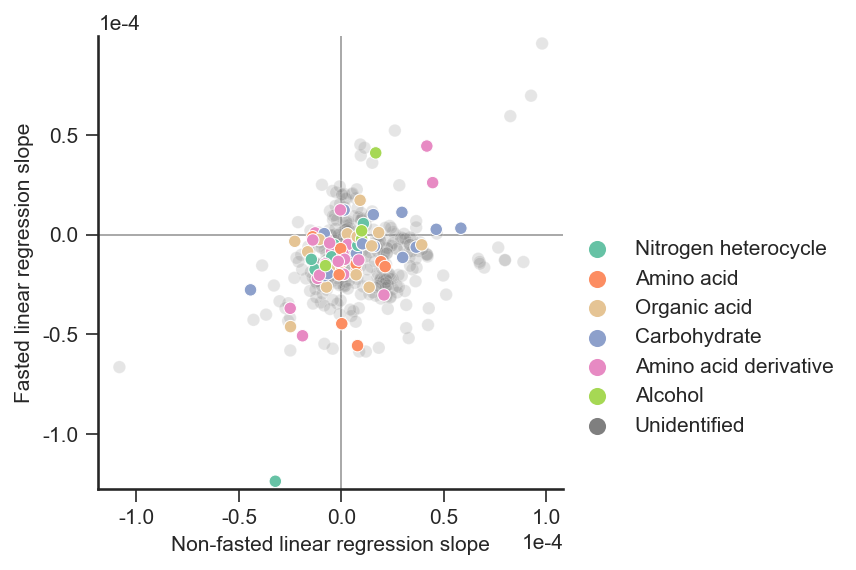

In [71]:
fig, ax = plt.subplots(figsize=(4,4), dpi=150)
sns.scatterplot(
    data=data.loc[(data['superclass'] != 'Unidentified') & (data['Type'] == 'metabolite')],
    x='coef_fed', y='coef_fasted', hue='superclass', ax=ax, palette=colors,
    alpha=1
)
sns.scatterplot(
    data=data.loc[(data['superclass'] == 'Unidentified') & (data['Type'] == 'metabolite')],
    x='coef_fed', y='coef_fasted', hue='superclass', ax=ax, palette=colors,
    alpha=0.2, zorder=-10
)

###### 2 options for making sure the axes are equally scaled to not bias against non-fasted:
########## 1. ax.set_aspect('equal') enforces square, but distorts plot
########## 2. ylim average +/- 0.5 * xlim range 
# ax.set_aspect('equal')

avg_ylim = np.mean([y for y in ax.get_ylim()])
xlim_range = abs(ax.get_xlim()[0] - ax.get_xlim()[1])
ax.set_ylim(avg_ylim-0.5*xlim_range, avg_ylim+0.5*xlim_range)

ax.set_ylabel('Fasted linear regression slope ')
ax.set_xlabel('Non-fasted linear regression slope')

ax.ticklabel_format(style='sci', scilimits=(-1, 1))
ax.axvline(0, c='gray', linewidth=0.8, alpha=0.8, zorder=-99)
ax.axhline(0, c='gray', linewidth=0.8, alpha=0.8, zorder=-99)
ax.legend(loc=(1.01, 0.1), markerscale=1.2)
sns.despine()

# Volcano plots

In [130]:
df = data[data_cols].T.copy()
df = (df
    .join(fg['bg_type'])
    .groupby('bg_type')
    .mean()
     )
fc = ((df.loc['RBG'] - df.loc['FBG'])
      .to_frame('Log2 Fold Change')
      .join(-np.log10(data[['qval_sampling', 'qval_ogtt', 'qval_sampling:ogtt']]))
      .join(data[['superclass', 'coef_fasted', 'coef_fed', 'model_param_ogtt']])
     )
fc['Fed - Fasted slope'] = fc['coef_fed'] - fc['coef_fasted']
fc

,Log2 Fold Change,qval_sampling,qval_ogtt,qval_sampling:ogtt,superclass,coef_fasted,coef_fed,model_param_ogtt,Fed - Fasted slope
m_0,0.278770,0.215666,3.638101,0.199433,Unidentified,6.955843e-05,0.000093,6.955843e-05,0.000023
m_1,0.877417,9.557695,2.554058,3.898589,Unidentified,-6.598915e-06,0.000037,-6.598915e-06,0.000044
m_2,-0.331312,0.739159,0.182324,0.164181,Nitrogen heterocycle,-6.092323e-07,-0.000010,-6.092324e-07,-0.000009
m_3,-0.712096,9.898440,1.068887,0.269242,Nitrogen heterocycle,-9.615231e-06,-0.000004,-9.615231e-06,0.000005
m_4,0.780719,0.395180,1.393920,0.586280,Nitrogen heterocycle,-1.235729e-04,-0.000032,-1.235729e-04,0.000091
...,...,...,...,...,...,...,...,...,...
l_868,0.511175,1.839662,2.485729,2.221285,Glycerolipid,2.209285e-07,0.000051,2.209284e-07,0.000051
l_869,0.612111,1.143740,0.397105,2.222574,Unidentified,-2.865160e-05,0.000054,-2.865160e-05,0.000083
l_870,-1.423496,7.933177,0.554414,2.223560,Unidentified,-1.689329e-05,0.000038,-1.689329e-05,0.000055
l_871,-1.735587,9.599182,0.785903,2.460408,Unidentified,-1.695555e-05,0.000045,-1.695555e-05,0.000062


In [145]:
def volcano(x, y, df, metab_type, alpha=0.8):
    fig, ax = plt.subplots(figsize=(4,4), dpi=100)
    sns.scatterplot(
        data=df.loc[(df['superclass'] != 'Unidentified') & (data['Type'] == metab_type)], 
        x=x, y=y, 
        hue='superclass', palette=colors, ax=ax, alpha=alpha,
    )
    sns.scatterplot(
        data=df.loc[(df['superclass'] == 'Unidentified') & (data['Type'] == metab_type)], 
        x=x, y=y, 
        hue='superclass', palette=colors, ax=ax, alpha=0.3, zorder=-10
    )
    ax.ticklabel_format(style='sci', scilimits=(-2, 2))
    ax.set_ylabel('-log10(q-value)')
    ax.legend(loc=(1.01, 0.1), markerscale=1.2)
    ax.set_title(y)
    ax.axvline(0, linewidth=1, c='0.5', zorder=-99)
    ax.axhline(-np.log10(0.05), linewidth=1, c='0.5', zorder=-99)
    sns.despine()
    return fig, ax

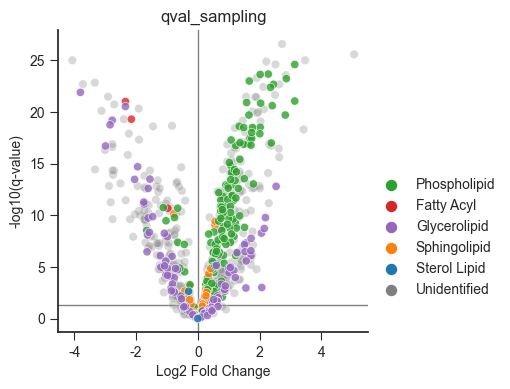

In [146]:
fig, ax = volcano(x='Log2 Fold Change', y='qval_sampling', df=fc, metab_type='lipid')

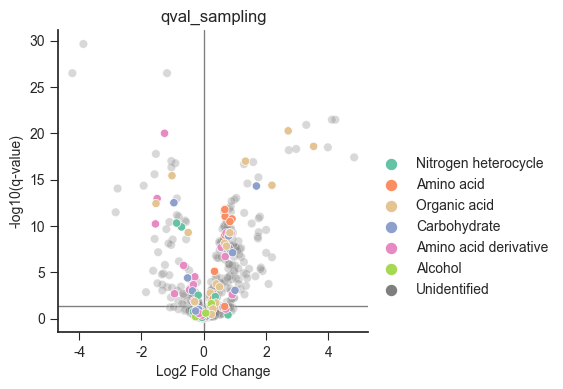

In [147]:
fig, ax = volcano(x='Log2 Fold Change', y='qval_sampling', df=fc, metab_type='metabolite', alpha=1)

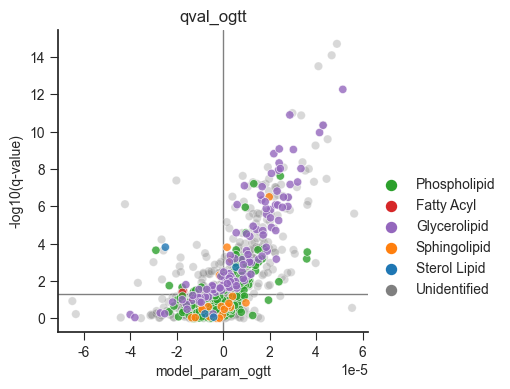

In [148]:
## This one looks weird because the x-axis is usually effect size. Effect size for OGTT LRT is unclear...

fig, ax = volcano(x='model_param_ogtt', y='qval_ogtt', df=fc, metab_type='lipid')

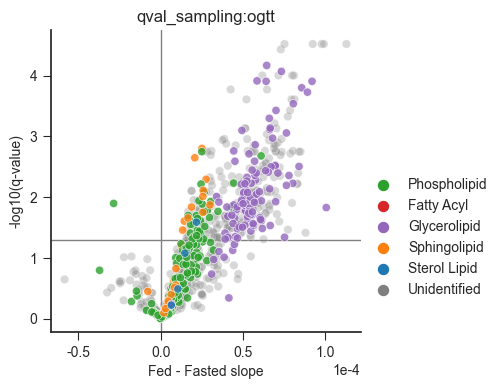

In [149]:
fig, ax = volcano(x='Fed - Fasted slope', y='qval_sampling:ogtt', df=fc, metab_type='lipid')

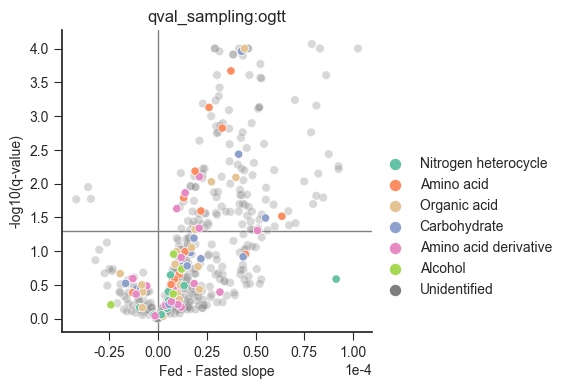

In [150]:
fig, ax = volcano(x='Fed - Fasted slope', y='qval_sampling:ogtt', df=fc, metab_type='metabolite', alpha=1)